# K-MEANS CLUSTER 2, 3 DAN 4

In [1]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Kode ini digunakan untuk mengambil data dari dua database berbeda (PostgreSQL dan MySQL), lalu menggabungkannya berdasarkan kolom id dan class, dan akhirnya mencetak hasilnya dalam bentuk tabel.

1. Library yang digunakan:

- psycopg2: koneksi ke PostgreSQL.

- pymysql: koneksi ke MySQL.

- pandas: untuk mengolah data tabular seperti tabel.

- numpy: diimpor tapi tidak dipakai.

2. Fungsi get_pg_data():

- Terkoneksi ke PostgreSQL.

- Mengambil semua data dari tabel sepaliris.

- Data dikonversi ke DataFrame agar mudah diolah.

3. Fungsi get_mysql_data():

- Terkoneksi ke MySQL.

- Mengambil semua data dari tabel petaliris.

- Juga dikonversi ke DataFrame.

4. Penggabungan data:

- Data dari kedua database digabung dengan pd.merge() berdasarkan kolom id dan class.

- Tipe join-nya inner, jadi hanya data yang cocok di kedua tabel yang diambil.

5. Output:

- Hasil penggabungan ditampilkan dalam bentuk tabel lengkap tanpa menampilkan nomor indeks.


In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          16.0         20.0          48.0         34.0
 13     Iris-setosa           1.4     

## Data asli

Proses dimulai dengan mengambil data numerik dari hasil penggabungan dua tabel, dengan membuang kolom non-numerik seperti `id` dan `class`. Data numerik tersebut kemudian diproses menggunakan PCA (Principal Component Analysis) tanpa melalui tahapan scaling, sehingga data tetap dalam skala aslinya.

PCA dilakukan untuk mereduksi dimensi data menjadi dua dan tiga komponen utama. Hasil dari reduksi dua dimensi digunakan untuk membuat scatter plot 2D, sementara hasil tiga dimensi digunakan untuk visualisasi dalam bentuk plot 3D.

Visualisasi ini memperlihatkan persebaran data berdasarkan komponen utama PCA yang mewakili variasi terbesar dari seluruh fitur. Karena data tidak diskalakan, fitur dengan rentang nilai lebih besar akan lebih memengaruhi arah komponen utama, sehingga distribusi dapat menjadi tidak seimbang. Oleh karena itu, pada banyak kasus, scaling diperlukan sebelum PCA untuk menyamakan kontribusi antar fitur.

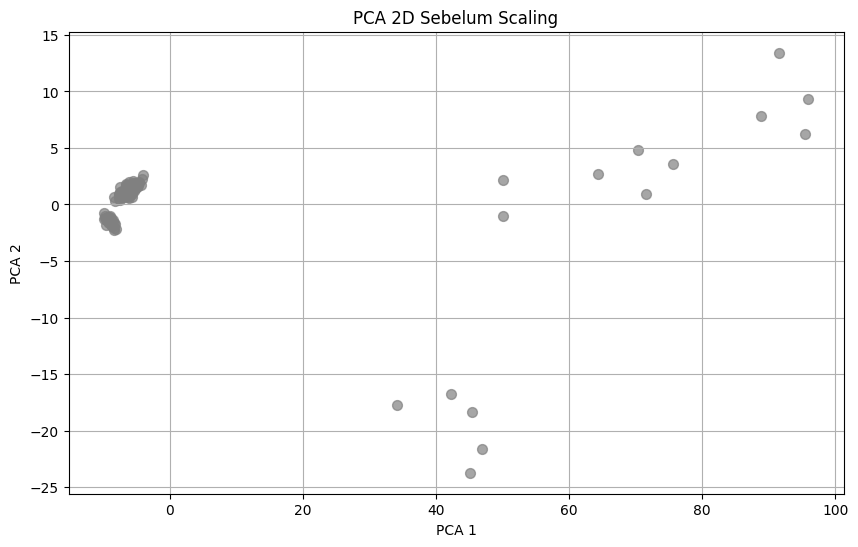

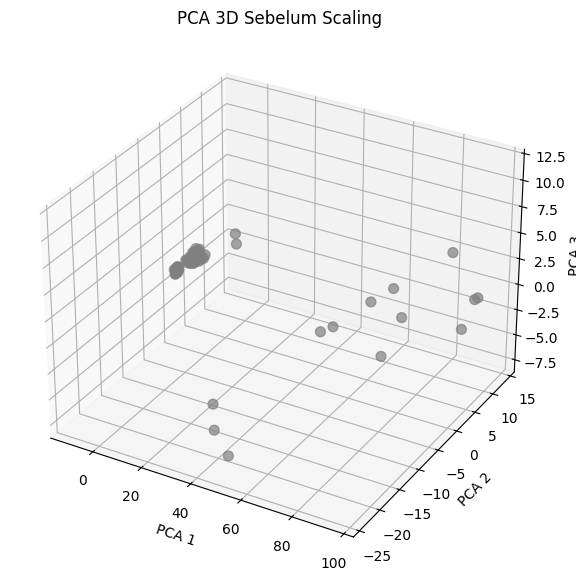

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ambil fitur numerik mentah (tanpa scaling)
features_raw = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah
pca_raw = PCA(n_components=2)
pca_2d_raw = pca_raw.fit_transform(features_raw)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_raw[:, 0], pca_2d_raw[:, 1], c='gray', s=50, alpha=0.7)
plt.title("PCA 2D Sebelum Scaling")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

pca_raw_3d = PCA(n_components=3)
pca_3d_raw = pca_raw_3d.fit_transform(features_raw)

# Visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_raw[:, 0], pca_3d_raw[:, 1], pca_3d_raw[:, 2],
           c='gray', s=50, alpha=0.7)

ax.set_title("PCA 3D Sebelum Scaling")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


## Data Normalisasi

Langkah pertama adalah mengambil data numerik dari hasil penggabungan dua tabel, dengan menghapus kolom non-numerik seperti `id` dan `class`. Data numerik tersebut kemudian dinormalisasi menggunakan **MinMaxScaler**, yang mengubah nilai setiap fitur ke dalam rentang 0 sampai 1. Proses ini bertujuan untuk menyetarakan skala antar fitur agar tidak ada fitur yang mendominasi hasil PCA karena perbedaan satuan atau rentang nilai.

Setelah normalisasi, data diproses dengan PCA (Principal Component Analysis) untuk mereduksi dimensi menjadi dua dan tiga komponen utama. Reduksi dua dimensi menghasilkan representasi data yang divisualisasikan dalam bentuk scatter plot 2D. Reduksi tiga dimensi divisualisasikan dalam bentuk scatter plot 3D.

Visualisasi menunjukkan distribusi data berdasarkan komponen utama PCA yang telah dihitung dari data yang sudah dinormalisasi. Dengan normalisasi terlebih dahulu, seluruh fitur memiliki kontribusi yang seimbang terhadap hasil PCA, sehingga pola distribusi yang dihasilkan lebih representatif terhadap struktur data sebenarnya.


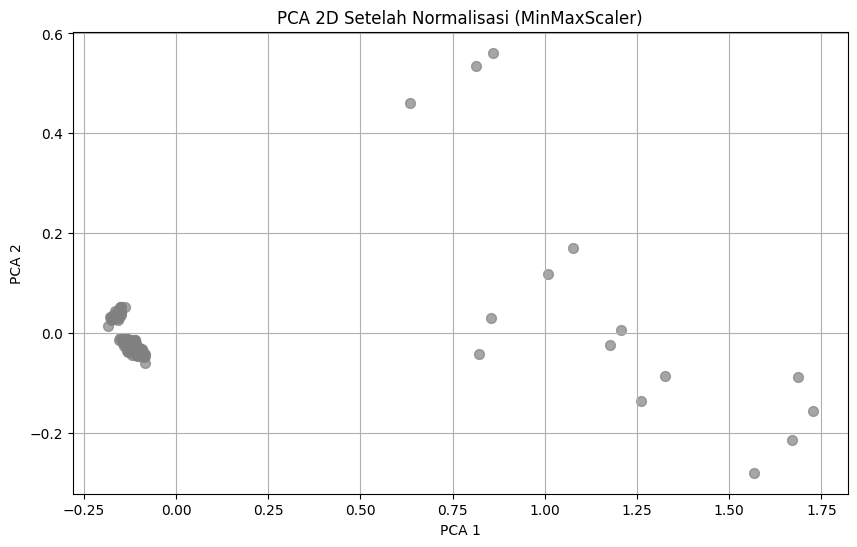

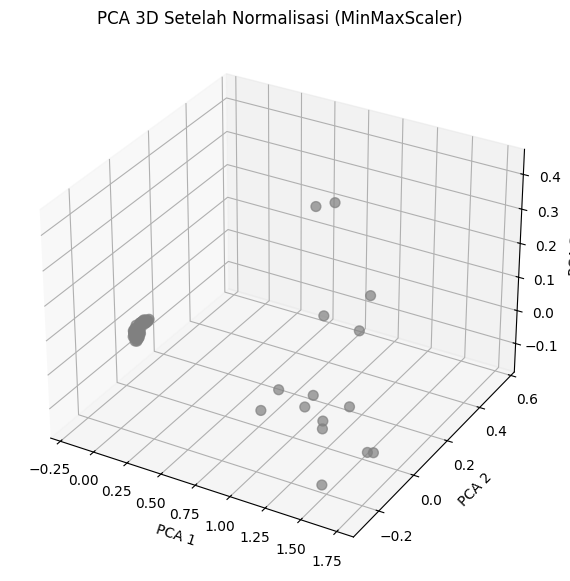

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # untuk 3D plot

# Ambil fitur numerik
features_raw = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_raw)

# PCA 2D setelah normalisasi
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(normalized_features)

# Visualisasi PCA 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], c='gray', s=50, alpha=0.7)
plt.title("PCA 2D Setelah Normalisasi (MinMaxScaler)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# PCA 3D setelah normalisasi
pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(normalized_features)

# Visualisasi PCA 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_data[:, 0], pca_3d_data[:, 1], pca_3d_data[:, 2],
           c='gray', s=50, alpha=0.7)

ax.set_title("PCA 3D Setelah Normalisasi (MinMaxScaler)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


## Preprocessing dan Reduksi Dimensi


Data numerik diperoleh dengan menghapus kolom non-numerik seperti `id` dan `class` dari hasil gabungan. Selanjutnya, dilakukan dua jenis normalisasi untuk keperluan perbandingan hasil reduksi dimensi menggunakan PCA (Principal Component Analysis).

1. StandardScaler
   Data dinormalisasi menggunakan StandardScaler yang mengubah nilai setiap fitur agar memiliki rata-rata 0 dan standar deviasi 1. Hasil normalisasi ini kemudian direduksi menjadi dua dimensi menggunakan PCA.

2. MinMaxScaler
   Data juga dinormalisasi menggunakan MinMaxScaler yang mengubah nilai setiap fitur ke rentang 0 hingga 1. Setelah normalisasi, PCA kembali digunakan untuk mereduksi dimensi menjadi dua komponen utama.

Hasil dari kedua pendekatan tersebut berupa dua set representasi data berdimensi dua, yang dapat digunakan untuk analisis lebih lanjut atau divisualisasikan guna membandingkan efek dari metode normalisasi terhadap distribusi data hasil PCA.



In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# StandardScaler
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(features)
standard_pca = PCA(n_components=2)
standard_reduced = standard_pca.fit_transform(standard_scaled)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(features)
minmax_pca = PCA(n_components=2)
minmax_reduced = minmax_pca.fit_transform(minmax_scaled)


In [6]:
print(standard_scaled)
print("-----------------")
print(minmax_scaled)

[[-0.47336355 -0.4992233  -0.36768452 -0.27454238]
 [ 0.5357241  -0.11465756  1.78761061  2.8056325 ]
 [-0.48137218 -0.4992233  -0.39176603 -0.30941228]
 [ 0.61581042  3.73099981  2.09464986  2.92186551]
 [-0.47336355 -0.4992233  -0.3737049  -0.26291908]
 [-0.44933765 -0.45649377 -0.34962339 -0.22804917]
 [-0.47336355 -0.47785854 -0.39778641 -0.28616568]
 [-0.46535492 -0.4992233  -0.3737049  -0.28616568]
 [-0.47336355 -0.4992233  -0.40982716 -0.34428219]
 [-0.46535492 -0.52058806 -0.37972527 -0.32103559]
 [-0.46535492 -0.4992233  -0.34962339 -0.25129578]
 [ 0.69589674  3.73099981  2.2150574   3.27056455]
 [-0.47336355 -0.52058806 -0.38574565 -0.33265889]
 [-0.49738945 -0.52058806 -0.41584754 -0.33265889]
 [-0.48938081 -0.4992233  -0.32554188 -0.21642587]
 [-0.46535492 -0.45649377 -0.33156225 -0.16993267]
 [-0.48137218 -0.45649377 -0.34962339 -0.22804917]
 [-0.47336355 -0.47785854 -0.36768452 -0.27454238]
 [-0.44933765 -0.47785854 -0.33156225 -0.23967248]
 [-0.46535492 -0.47785854 -0.36

## Clustering + Visualisasi (2 Cluster)


Data yang telah dinormalisasi dengan MinMaxScaler direduksi ke dalam tiga dimensi menggunakan PCA (Principal Component Analysis). Hasil reduksi ini digunakan sebagai input untuk algoritma KMeans clustering dengan jumlah cluster sebanyak 2.

Setelah proses klasterisasi, dua metrik evaluasi dihitung:

* Inertia: total jarak kuadrat antar titik dan pusat cluster masing-masing. Nilai lebih kecil menunjukkan cluster yang lebih rapat.
* Silhouette Score: mengukur seberapa baik setiap titik cocok dengan clusternya dibandingkan dengan cluster lain. Nilai berkisar antara -1 hingga 1; nilai mendekati 1 menunjukkan pemisahan cluster yang baik.

Visualisasi hasil klasterisasi ditampilkan dalam bentuk scatter plot 3D berdasarkan hasil PCA. Warna tiap titik ditentukan oleh label cluster dari KMeans, dan ukuran titik diperbesar untuk kejelasan. Visualisasi ini memberikan gambaran distribusi data dalam ruang tiga dimensi serta pemisahan antar dua cluster yang terbentuk.



[2 Clusters] Inertia: 3.49, Silhouette Score: 0.9173


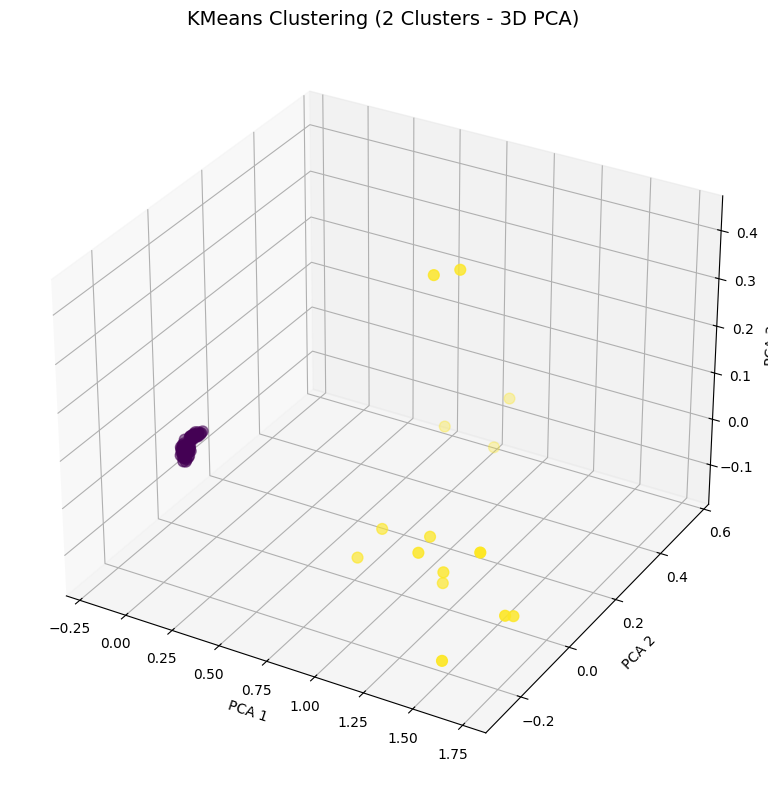

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# PCA 3D
pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(minmax_reduced_3d)

# Evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(minmax_scaled, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.2f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D (ukuran diperbesar)
fig = plt.figure(figsize=(12, 8))  # Lebar dan tinggi ditingkatkan
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
                c=labels_2, cmap='viridis', s=60)

ax.set_title("KMeans Clustering (2 Clusters - 3D PCA)", fontsize=14)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.tight_layout()
plt.grid(True)
plt.show()


## Clustering + Visualisasi (3 Cluster)


Data yang telah dinormalisasi dengan MinMaxScaler direduksi menggunakan PCA menjadi dua dan tiga dimensi. Hasil reduksi dua dimensi digunakan untuk visualisasi 2D, sedangkan hasil reduksi tiga dimensi digunakan untuk visualisasi 3D.

Kemudian, dilakukan KMeans clustering dengan jumlah cluster sebanyak 3 pada data yang telah dinormalisasi (bukan data hasil PCA). Model KMeans menghasilkan label cluster untuk setiap data, yang digunakan dalam proses visualisasi.

Dua metrik evaluasi digunakan untuk menilai hasil clustering:

* Inertia: total jarak kuadrat antara setiap data dan pusat cluster-nya. Nilai lebih kecil menunjukkan cluster yang lebih kompak.
* ilhouette Score: mengukur sejauh mana setiap titik cocok dengan cluster-nya sendiri dibandingkan dengan cluster lain. Nilai berkisar dari -1 hingga 1; semakin tinggi, semakin baik pemisahannya.

Visualisasi pertama menampilkan hasil clustering dalam plot 2D menggunakan hasil PCA 2 komponen. Warna pada scatter plot menunjukkan label cluster hasil KMeans.

Visualisasi kedua menampilkan hasil clustering dalam plot 3D menggunakan hasil PCA 3 komponen. Plot ini memperlihatkan distribusi data dan bentuk pemisahan antar cluster dalam ruang tiga dimensi.


Tujuan dari proses ini adalah untuk melihat struktur dan pemisahan alami pada data dalam jumlah cluster yang lebih dari dua, serta membandingkan visualisasi hasil clustering dalam dua dan tiga dimensi.



[3 Clusters] Inertia: 1.65, Silhouette Score: 0.9015


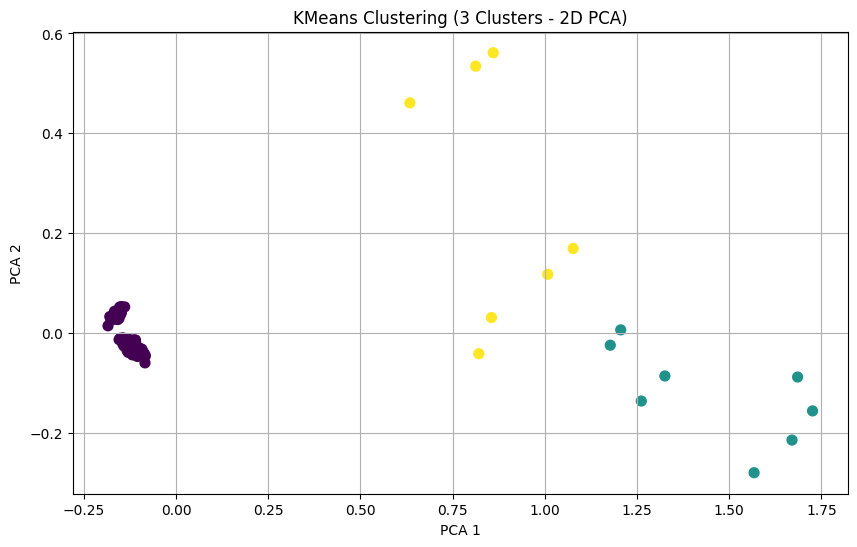

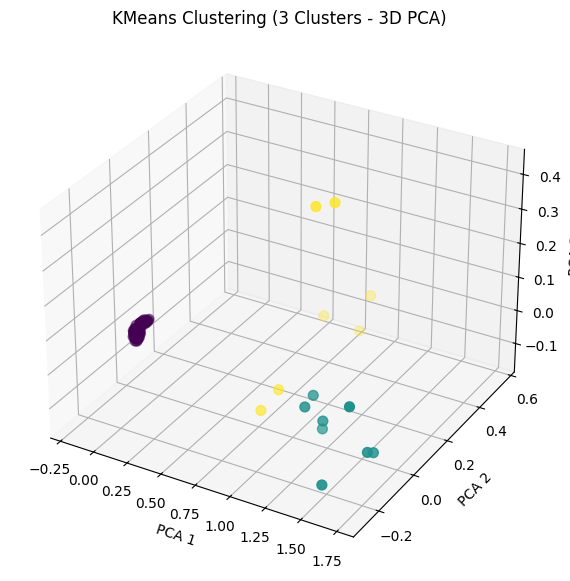

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Untuk plotting 3D

# PCA 2D (jika belum dilakukan sebelumnya)
pca_2d = PCA(n_components=2)
minmax_reduced_2d = pca_2d.fit_transform(minmax_scaled)

# PCA 3D
pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(minmax_scaled)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(minmax_scaled, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.2f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 2D
plt.figure(figsize=(10, 6))
plt.scatter(minmax_reduced_2d[:, 0], minmax_reduced_2d[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters - 2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# Visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
                c=labels_3, cmap='viridis', s=50)

ax.set_title("KMeans Clustering (3 Clusters - 3D PCA)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


## Clustering + Visualisasi (4 Cluster)

1. Reduksi Dimensi dengan P

Reduksi dimensi dilakukan untuk menyederhanakan representasi data tanpa kehilangan terlalu banyak informasi. Dalam konteks ini, dua jenis reduksi digunakan:

Reduksi ke 2 Dimensi (2D
  Data yang telah dinormalisasi (dalam bentuk min-max scaled) dikurangi dimensinya menjadi dua komponen utama menggunakan teknik Principal Component Analysis (PCA). Ini memungkinkan visualisasi data dalam bidang dua dimensi.

Reduksi ke 3 Dimensi (3D
  Data yang sama juga direduksi menjadi tiga dimensi, sehingga dapat divisualisasikan dalam ruang tiga dimensi. Ini berguna untuk menangkap lebih banyak variasi data jika dua dimensi dianggap kurang mewakili.



2. Penerapan KMeans Clusteri

Proses pengelompokan dilakukan menggunakan algoritma *KMeans*:

* Sebanya4 klast ditentukan sebagai jumlah kelompok yang akan dibentuk.
* Model *KMeans* dilatih menggunakan data yang telah dinormalisasi (bukan hasil PCA).
* Setelah pelatihan, setiap data diberi label klaster berdasarkan kedekatannya ke pusat klaster yang dihitung oleh algoritma.


3. Evaluasi Hasil Clusteri

Dua metrik evaluasi digunakan untuk menilai kualitas klaster:

Inerti
  Ini merupakan jumlah total jarak kuadrat dari tiap titik ke pusat klaster terdekat. Semakin kecil nilainya, semakin baik, karena menandakan bahwa titik-titik dalam klaster lebih rapat satu sama lain.

Silhouette Scor
  Ini mengukur seberapa mirip suatu titik dengan titik-titik dalam klasternya sendiri dibandingkan dengan klaster lain. Nilai berkisar antara -1 hingga 1, dengan nilai mendekati 1 menunjukkan pemisahan klaster yang baik.


4. Visualisasi Hasil Clustering

Untuk memahami struktur klaster secara visual, hasil reduksi dimensi digunakan sebagai berikut:

* Visualisasi 2D:
  Data hasil reduksi ke dua dimensi diplot dalam bidang dua dimensi. Titik-titik berwarna berdasarkan klaster hasil *KMeans*. Visualisasi ini memudahkan dalam mengamati pola pemisahan klaster di bidang datar.

* Visualisasi 3
  Data hasil reduksi ke tiga dimensi divisualisasikan dalam ruang tiga dimensi menggunakan plot 3D. Ini memberikan perspektif tambahan terhadap struktur klaster dan distribusi data antar dimensi utama.



[4 Clusters] Inertia: 1.06, Silhouette Score: 0.9007


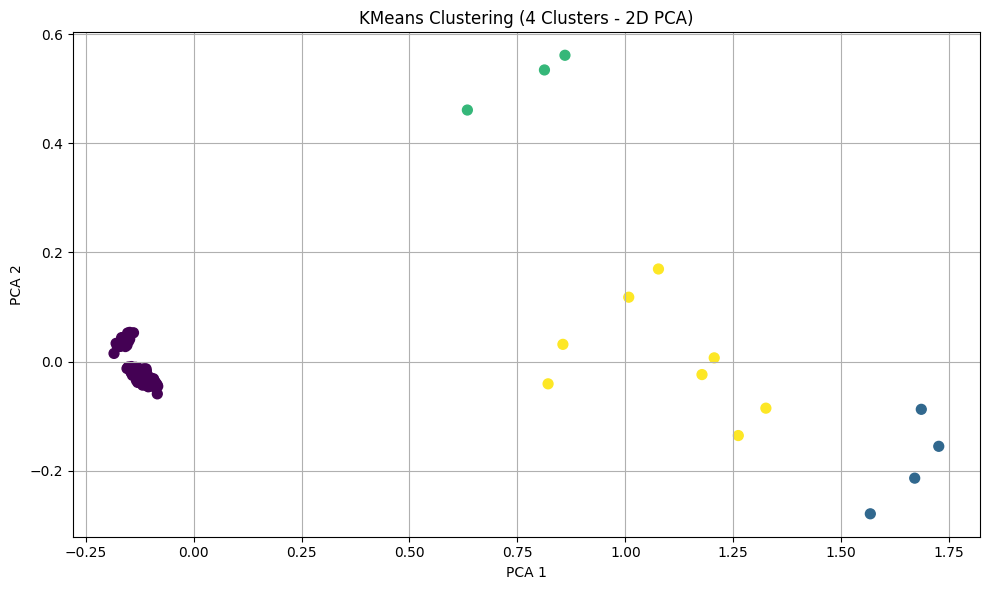

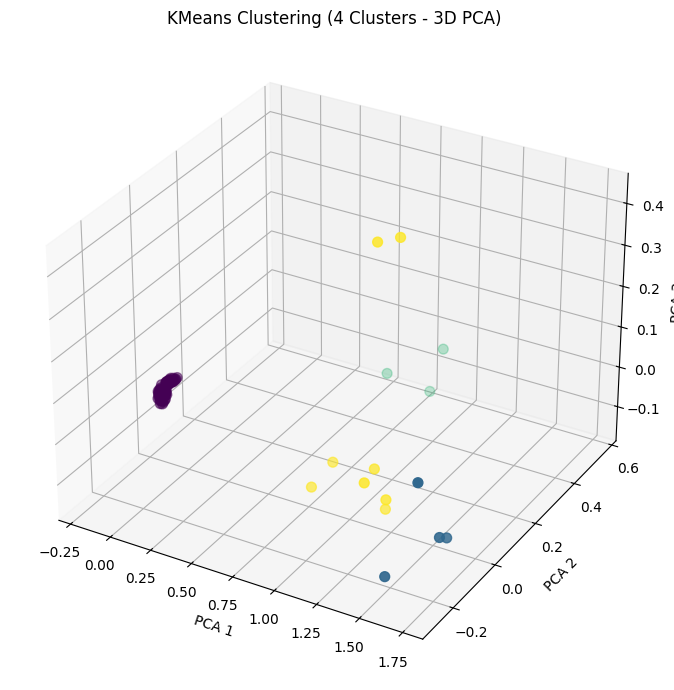

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA 2D dan 3D
pca_2d = PCA(n_components=2)
minmax_reduced_2d = pca_2d.fit_transform(minmax_scaled)

pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(minmax_scaled)

# Evaluasi
inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(minmax_scaled, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.2f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 2D (ukuran diperbesar)
plt.figure(figsize=(10, 6))  # Lebar ditambah
plt.scatter(minmax_reduced_2d[:, 0], minmax_reduced_2d[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters - 2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi 3D (ukuran diperbesar)
fig = plt.figure(figsize=(10, 7))  # Lebar ditambah
ax = fig.add_subplot(111, projection='3d')
ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
           c=labels_4, cmap='viridis', s=50)

ax.set_title("KMeans Clustering (4 Clusters - 3D PCA)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.tight_layout()
plt.grid(True)
plt.show()
